**Group Members: Jessica Rolen, Jonathon Lor, Patrick Zimmerman**

**Executive Summary:**



The given report discusses various attempts to display data using boxplots and scatter plots, and also highlights the sensitivity of the mean to outliers. It indicates that the Mid-Career 90th Salary Max is higher than the mean and falls in the whiskers of the boxplot. The report also suggests the presence of outliers for the 75th and 90th salary ranges, and that more information is required to understand the variability of the data. A new CSV file was created, which categorizes undergraduate majors into 9 distinct schools to create a traditional linear regression model, in order to predict salary ranges from starting median salary to mid-career 90th percentile salary. The report concludes by explaining that linear regression is selected to assume a linear relationship between variables, and to check the performance of the model using metrics such as Standard Error and R-squared value.

**Introduction:**

Our project focuses on analyzing and displaying data related to undergraduate majors and their associated salaries. It highlights the importance of understanding the sensitivity of statistical measures, such as the mean, to outliers. Additionally, our project discusses the use of boxplots and scatter plots to display the data and identifies potential outliers in the 75th and 90th salary ranges.

To further analyze the data, a new CSV file was created to categorize undergraduate majors into nine distinct schools and use a linear regression model to predict salary ranges. Linear regression is selected because it assumes a linear relationship between variables and can be used to assess the performance of the model using metrics such as the Standard Error and R-squared value.

Overall, this project aims to provide insights into the variability of undergraduate salaries and how they relate to different majors and schools.

**Data Exploration and Visualization:**

In [ ]:
# Imported orginal degrees-that-pay-back.csv file from local computer.

from google.colab import files
uploaded = files.upload()

Saving degrees-that-pay-back.csv to degrees-that-pay-back (1).csv


In [ ]:
# Load data file and displaying first 5 rows.

import pandas as pd
df = pd.read_csv("degrees-that-pay-back.csv")
df.head()

,Index,Schools,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,1,Agriculture,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
1,1,Agriculture,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00"
2,2,Architecture,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
3,3,Arts and Sciences,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,3,Arts and Sciences,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"


In [ ]:
# Conversion from object to float64 was needed our numerical attributes.
# This code replaces "$" and "," strings with empty strings so that all values will be free from $ and comma.

def clean(x):
    if isinstance(x,str):
        for i in ('$',','):
            x = x.replace(i,'')
    return x

In [ ]:
# Undergraduate is left out since it does not contain numbers.

cols = ['Starting Median Salary',
 'Mid-Career Median Salary',
 'Percent change from Starting to Mid-Career Salary',
 'Mid-Career 10th Percentile Salary',
 'Mid-Career 25th Percentile Salary',
 'Mid-Career 75th Percentile Salary',
 'Mid-Career 90th Percentile Salary']

In [ ]:
# Takes 1 column and then removes "$" and "," from each line of that column, then converts to float64

for col in cols:
    df[col] = df[col].apply(lambda x:clean(x))
    df[col] = df[col].astype('float64')

In [ ]:
# Verfies conversion from object to float64 is complete.
df.dtypes

Index                                                  int64
Schools                                               object
Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object

In [ ]:
# Provides stats for all columns. Since count is 50, it means no values are missing.

df.describe(include="all")

,Index,Schools,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50,50,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
unique,NaN,9,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Arts and Sciences,Agriculture,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,22,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.440000,NaN,NaN,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,2.071773,NaN,NaN,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,1.000000,NaN,NaN,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,3.000000,NaN,NaN,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,3.500000,NaN,NaN,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,7.000000,NaN,NaN,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000


In [ ]:
# Shows the count of all qualitative ordinal or qualitative binary attributes. The only qualitative nominal attributes are the Undergraduate Major and each count is 1. No missing values in this column.

df['Undergraduate Major'].value_counts()

Agriculture                             1
Chemical Engineering                    1
Construction                            1
Economics                               1
Finance                                 1
International Relations                 1
Management Information Systems (MIS)    1
Marketing                               1
Film                                    1
Graphic Design                          1
Education                               1
Aerospace Engineering                   1
Civil Engineering                       1
Forestry                                1
Computer Engineering                    1
Computer Science                        1
Electrical Engineering                  1
Industrial Engineering                  1
Information Technology (IT)             1
Mechanical Engineering                  1
Health Care Administration              1
Interior Design                         1
Nutrition                               1
Physician Assistant               

In [ ]:
# Shows missing values for qualitative nominal attributes. No missing values were reported.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Index                                              50 non-null     int64  
 1   Schools                                            50 non-null     object 
 2   Undergraduate Major                                50 non-null     object 
 3   Starting Median Salary                             50 non-null     float64
 4   Mid-Career Median Salary                           50 non-null     float64
 5   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 6   Mid-Career 10th Percentile Salary                  50 non-null     float64
 7   Mid-Career 25th Percentile Salary                  50 non-null     float64
 8   Mid-Career 75th Percentile Salary                  50 non-null     float64
 9   Mid-Career 9

In [ ]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import plotly.express as px
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
# https://pypi.python.org/pypi/lasio



# Read file and create data frame
dataframe=pd.read_csv("degrees-that-pay-back.csv")
df=dataframe

def clean(x):
    if isinstance(x,str):
        for i in ('$',','):
            x = x.replace(i,'')
    return x
    
for col in cols:
    df[col] = df[col].apply(lambda x:clean(x))
    df[col] = df[col].astype('float64')


UM = dataframe["Undergraduate Major"]
SMS = dataframe["Starting Median Salary"]
MCMS = dataframe["Mid-Career Median Salary"]
PC = dataframe["Percent change from Starting to Mid-Career Salary"]
MC10 = dataframe["Mid-Career 10th Percentile Salary"]
MC25 = dataframe["Mid-Career 25th Percentile Salary"]
MC75 = dataframe["Mid-Career 75th Percentile Salary"]
MC90 = dataframe["Mid-Career 90th Percentile Salary"]



#sns.boxplot(x=df["Starting Median Salary"]) 
#sns.boxplot(y=df["Mid-Career Median Salary"])
#plt.show()



fig=px.box(df,x="Undergraduate Major", y="Starting Median Salary")

#df.boxplot(showfliers=False)
#fig.show()

fig=px.box(df,x="Undergraduate Major", y="Mid-Career Median Salary")
fig.show()

fig=px.box(df,x="Undergraduate Major", y="Percent change from Starting to Mid-Career Salary")
fig.show()

fig=px.box(df,x="Undergraduate Major", y="Mid-Career 10th Percentile Salary")
fig.show()

fig=px.box(df,x="Undergraduate Major", y="Mid-Career 25th Percentile Salary")
fig.show()

fig=px.box(df,x="Undergraduate Major", y="Mid-Career 75th Percentile Salary")
fig.show()

fig=px.box(df,x="Undergraduate Major", y="Mid-Career 90th Percentile Salary")
fig.show()

#df.boxplot(showfliers=False)

#boxplot=df.boxplot(column=['Mid-Career Median Salary'],by=['Undergraduate Major'])
#sns.boxplot(data=df,x='Undergraduate Major',y='Mid-Career Median Salary')
df.describe()

,Index,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.440000,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,2.071773,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,1.000000,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,3.000000,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,3.500000,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,7.000000,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,9.000000,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


The boxplots displayed with data points only. Many different atempts were made to smooth and configure the data within the boxplots. However, all attempts were unsuccesful. In displaying a description of a dataframe, Mid-Career 90th Salary Max is 210,000 while its mean is 142,766. This mean appears to be the most sensitive to outliers. The mean, however, is not so small that the max value would be considered an outlier. Most max values fell between 74,000 and 170,000. The 75th percentile and 90th percentile likely had outliers as they are outside the minimum and maximum ranges. All other values indicate a difference of around 30,000 between the minimum and maximum values. The 75th percentile and 90th percentile values however somewhat exceed and significantly exceed the range, respectively.

The interquartile range represented is the difference between the 25th percentile and the 75th percentile. In looking at this range, values were between 12,825 and 18,725. The range for mid-career median salary was higher at 27,925. The range for 75th percent and 90th percent salaries exceeded 35,000. It appears Mid-Career falls outside the 25th percentile, the median, and the 75th percentile. This indicates it exists in the 'whiskers' of the boxplot.

In looking at the distributions, more information is needed to understand the variability of the data. Had a boxplot displayed, it would have provided a good indication of how the values of the data are spread out.

The most obvious outliers appear to be for the 75th and 90th salary ranges as they both have a wider spread between the maximum values and means than the other salary ranges.

The outliers could be incorrect, it is common that they are not truly outliers. They are values outside the distribution and/or near extremes of the interquartile range.

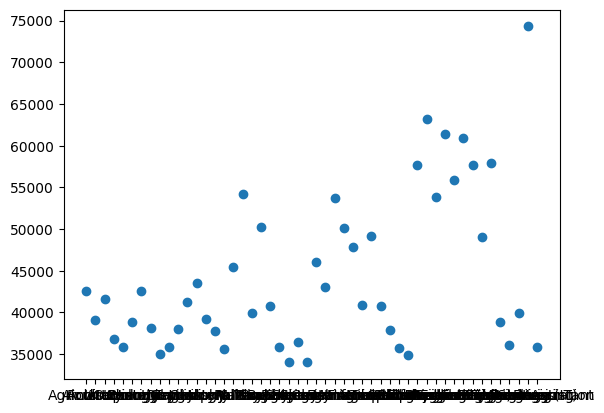

In [ ]:
plt.scatter(df['Undergraduate Major'],df['Starting Median Salary'])
plt.show()

Scatter Plot - This Scatter plot shows the relationship between the above continuous variables. If a relationship exists, the scatter plot would indicate a direction along with either a line or a curve.

In looking at the direction strength and linear relationship between Undergraduate Major and Starting Median Salary, there appears to be a strong upward relationship between 35,000 and 45,000. For careers that cannot be identified in the display. There are also indications of negative correlations between 65,000 and 35,000. Again, it is unclear from the display which undergrad degrees are in this range.

Areas of the plot display tighter clustering and possibly stronger relationships than points with greater distance between them. For the most part, the data seems to have a more curved relationship than linear.

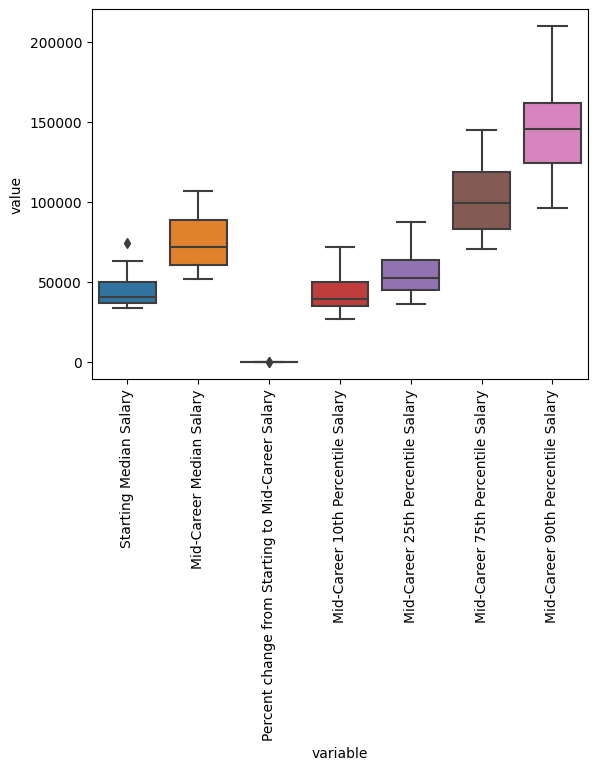

In [ ]:
# get dataframe containing all float columns
df_float = df.select_dtypes('float64')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# pd.melt(df_float): it will put one column value on top of another
sns.boxplot(x="variable", y="value", data=pd.melt(df_float))

# make the xticks verticle, else all names will overlap becaue of large text
plt.xticks(rotation=90)
plt.show()

This boxplot is a bit of a different representation than what was seen. Just as the display of data showed, Mid-Career 90th Salary Max is just over 200,000 while its mean is approximately 150,000. In this view, there are no outliers. The mean is not so small that the max value would be considered an outlier. Most max values fell between 50,000 and 75,000. The 75th percentile and 90th percentile do not appear to have outliers as they have no values outside the minimum and maximum ranges. All other values indicate a difference of around 30,000 between the minimum and maximum values. Just as the table in question 11 indicates, the 75th percentile and 90th percentile values however somewhat exceed and significantly exceed the range, respectively.

The interquartile range represented is the difference between the 25th percentile and the 75th percentile. In looking at the boxplot, values are higher than those in question 11 with values between 12,825 and 18,725. The range for mid-career median salary was higher at 75,000. The range for 75th percent and 90th percent salaries exceeded 35,000. It appears Mid-Career falls inside the 25th percentile, the median, and the 75th percentile. This indicates it exists within proximity of the median of the boxplot.

According to the boxplot, the distributions indicate that the values of the data are mostly between 40,000 and 75,000.

While it appears the 75th and 90th salary ranges could be outliers, it seems they are actually values that are outside the distribution range.

**Data Preparation:**

A new .csv file was created and called "degrees-that-pay-back-PZ.csv". We added a "Schools" column to categorize the Undergraduate Majors into 9 distinct schools: Agriculture, Architecture, Arts and Sciences, Business, Digital Media, Education, Engineering and Computer Science, Health and Human Sciences, and Music. The idea was to condense the Undergraduate Majors and assign them to the X-axis while salaries were assigned to the Y-axis in order to create a traditional linear regression model.

In [ ]:
#Imported "degrees-that-pay-back-PZ.csv" file from local computer.

from google.colab import files
uploaded = files.upload()

Saving degrees-that-pay-back-PZ.csv to degrees-that-pay-back-PZ (1).csv


In [ ]:
#Loaded orginal data file and displayed rows.

import pandas as pd
df = pd.read_csv("degrees-that-pay-back-PZ.csv")
df.head()

,Index,Schools,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,1,Agriculture,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
1,1,Agriculture,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00"
2,2,Architecture,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"
3,3,Arts and Sciences,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,3,Arts and Sciences,Art History,"$35,800.00","$64,900.00",81.3,"$28,800.00","$42,200.00","$87,400.00","$125,000.00"


We decided that renaming the attributes was unneeded since it was self-explanatory. Shortening the attributes will only make the descriptions more vague.

In [ ]:
# We noticed that our salary attributes were objects, which would lead us to difficulties in performing any mathematical calculations.

df.dtypes

Index                                                  int64
Schools                                               object
Undergraduate Major                                   object
Starting Median Salary                                object
Mid-Career Median Salary                              object
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                     object
Mid-Career 25th Percentile Salary                     object
Mid-Career 75th Percentile Salary                     object
Mid-Career 90th Percentile Salary                     object
dtype: object

In [ ]:
# Our solution was to convert those object attributes to float64; however, the issue converting from object to float64 was due to the "$" and "," in those attributes.
# This code replaces the "$" and "," with empty strings so that all values will be free from $ and comma.

def clean(x):
    if isinstance(x,str):
        for i in ('$',','):
            x = x.replace(i,'')
    return x

In [ ]:
# Undergraduate is left out since it does not contain numbers.

cols = ['Starting Median Salary',
 'Mid-Career Median Salary',
 'Percent change from Starting to Mid-Career Salary',
 'Mid-Career 10th Percentile Salary',
 'Mid-Career 25th Percentile Salary',
 'Mid-Career 75th Percentile Salary',
 'Mid-Career 90th Percentile Salary']

In [ ]:
# Takes 1 column and then removes "$" and "," from each line of that column, then converts to float64

for col in cols:
    df[col] = df[col].apply(lambda x:clean(x))
    df[col] = df[col].astype('float64')

In [ ]:
# Verified conversion to from object to float64 is complete.

df.dtypes

Index                                                  int64
Schools                                               object
Undergraduate Major                                   object
Starting Median Salary                               float64
Mid-Career Median Salary                             float64
Percent change from Starting to Mid-Career Salary    float64
Mid-Career 10th Percentile Salary                    float64
Mid-Career 25th Percentile Salary                    float64
Mid-Career 75th Percentile Salary                    float64
Mid-Career 90th Percentile Salary                    float64
dtype: object

**Data Modeling:**

Our modeling approach follows a simple linear regression. We use this approach because we can predict one single variable, the Undergraduate Major, to determine salary ranges from starting median salary to mid-career 90th percentile salary. With this model, we can also predict target values using a regression table that will tell us how accurate our model is. The performance of the model will use metrics including the Standard Error, R-squared value and other values that explain the variability of the data. By selecting linear regression to understand the relationship between variables, we assume a linear relationship exists between the independent and dependent variables. We also assume any residuals are independent and normally distributed.

In [ ]:
df[['Index','Schools']].value_counts()

Index  Schools                         
3      Arts and Sciences                   22
7      Engineering and Computer Science     9
4      Business                             8
8      Health and Human Sciences            4
1      Agriculture                          2
5      Digital Media                        2
2      Architecture                         1
6      Education                            1
9      Music                                1
dtype: int64

<Axes: xlabel='Index', ylabel='Mid-Career Median Salary'>

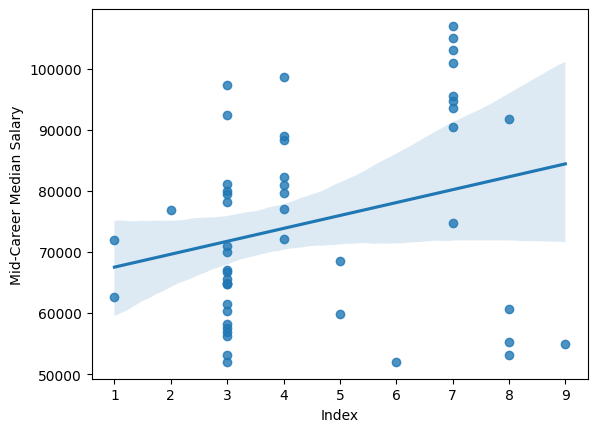

In [ ]:
sns.regplot(x ="Index", y ="Mid-Career Median Salary", data = df) 

**Modeling Assumptions Satisfied:**

**Linearity**: The relationship between X and the mean of Y is linear. As tested with the scatter plot above, independent and dependent variables are linear. Outliers were also taken into consideration. 

**Homoscedasticity**: The variance of residual is the same for any value of X. Tested with a scatter plot of residuals versus predicted values.  


**Independence**: Observations are independent of each other. Multicollinearity was evaluated and college majors were grouped into similar schools. 

**Normality**: For any fixed value of X, Y is normally distributed. These data were checked using box plots to identify any outliers and assumed a normal distribution. 


<ipython-input-22-85e8668af01c>:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Type for variable corr: <class 'pandas.core.frame.DataFrame'>
And just the content: 
                                                     Index  \
Index                                              1.00000   
Percent change from Starting to Mid-Career Salary -0.38095   

                                                   Percent change from Starting to Mid-Career Salary  
Index                                                                                       -0.38095  
Percent change from Starting to Mid-Career Salary                                            1.00000  


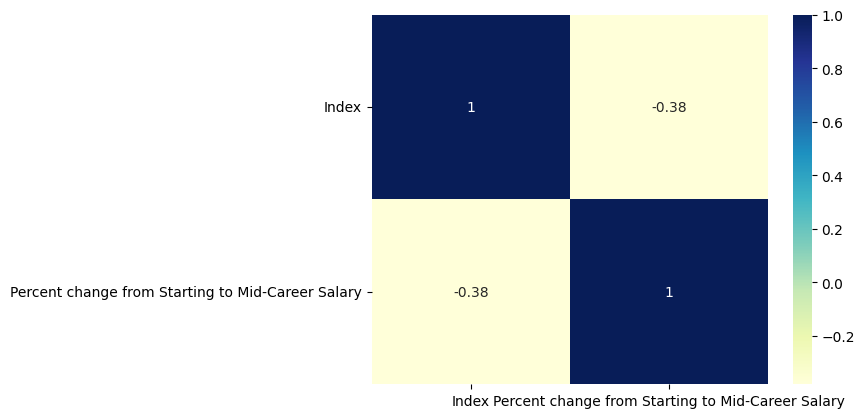

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Read dataset
data = pd.read_csv("degrees-that-pay-back-PZ.csv") 

# Correlation matrix
corr=data.corr()

# What data type is corr?
print(f'Type for variable corr: {type(corr)}')
print(f'And just the content: \n{corr}')

# Plot Heatmap on correlation matrix 
sns.heatmap(corr, annot=True, cmap='YlGnBu')


# display the plot
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Index                                              50 non-null     int64  
 1   Schools                                            50 non-null     object 
 2   Undergraduate Major                                50 non-null     object 
 3   Starting Median Salary                             50 non-null     object 
 4   Mid-Career Median Salary                           50 non-null     object 
 5   Percent change from Starting to Mid-Career Salary  50 non-null     float64
 6   Mid-Career 10th Percentile Salary                  50 non-null     object 
 7   Mid-Career 25th Percentile Salary                  50 non-null     object 
 8   Mid-Career 75th Percentile Salary                  50 non-null     object 
 9   Mid-Career 9

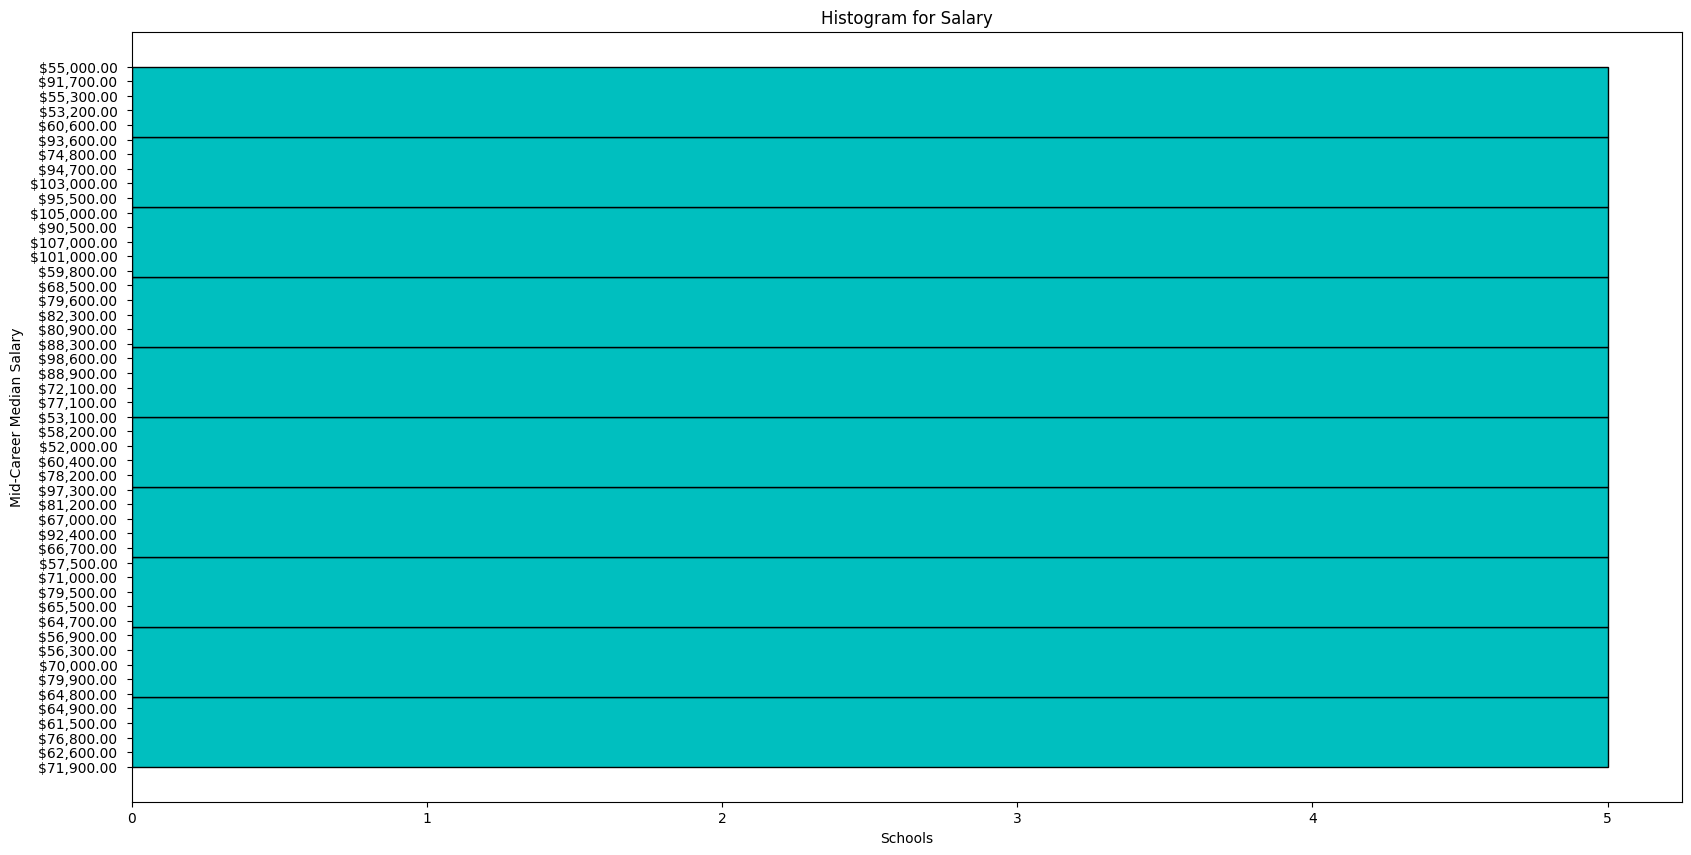

In [ ]:
# Use histograms to check distribution
# histogram of Weight
import matplotlib.pyplot as plt

x = data ['Mid-Career Median Salary']
y = data ['Index']
plt.figure(figsize=(20,10))
plt.hist(x, color='c', edgecolor='k', bins=10, orientation='horizontal')

plt.title('Histogram for Salary')
plt.xlabel('Schools')
plt.ylabel('Mid-Career Median Salary')
plt.show()


**Visualization and Interpretation of the Model:**

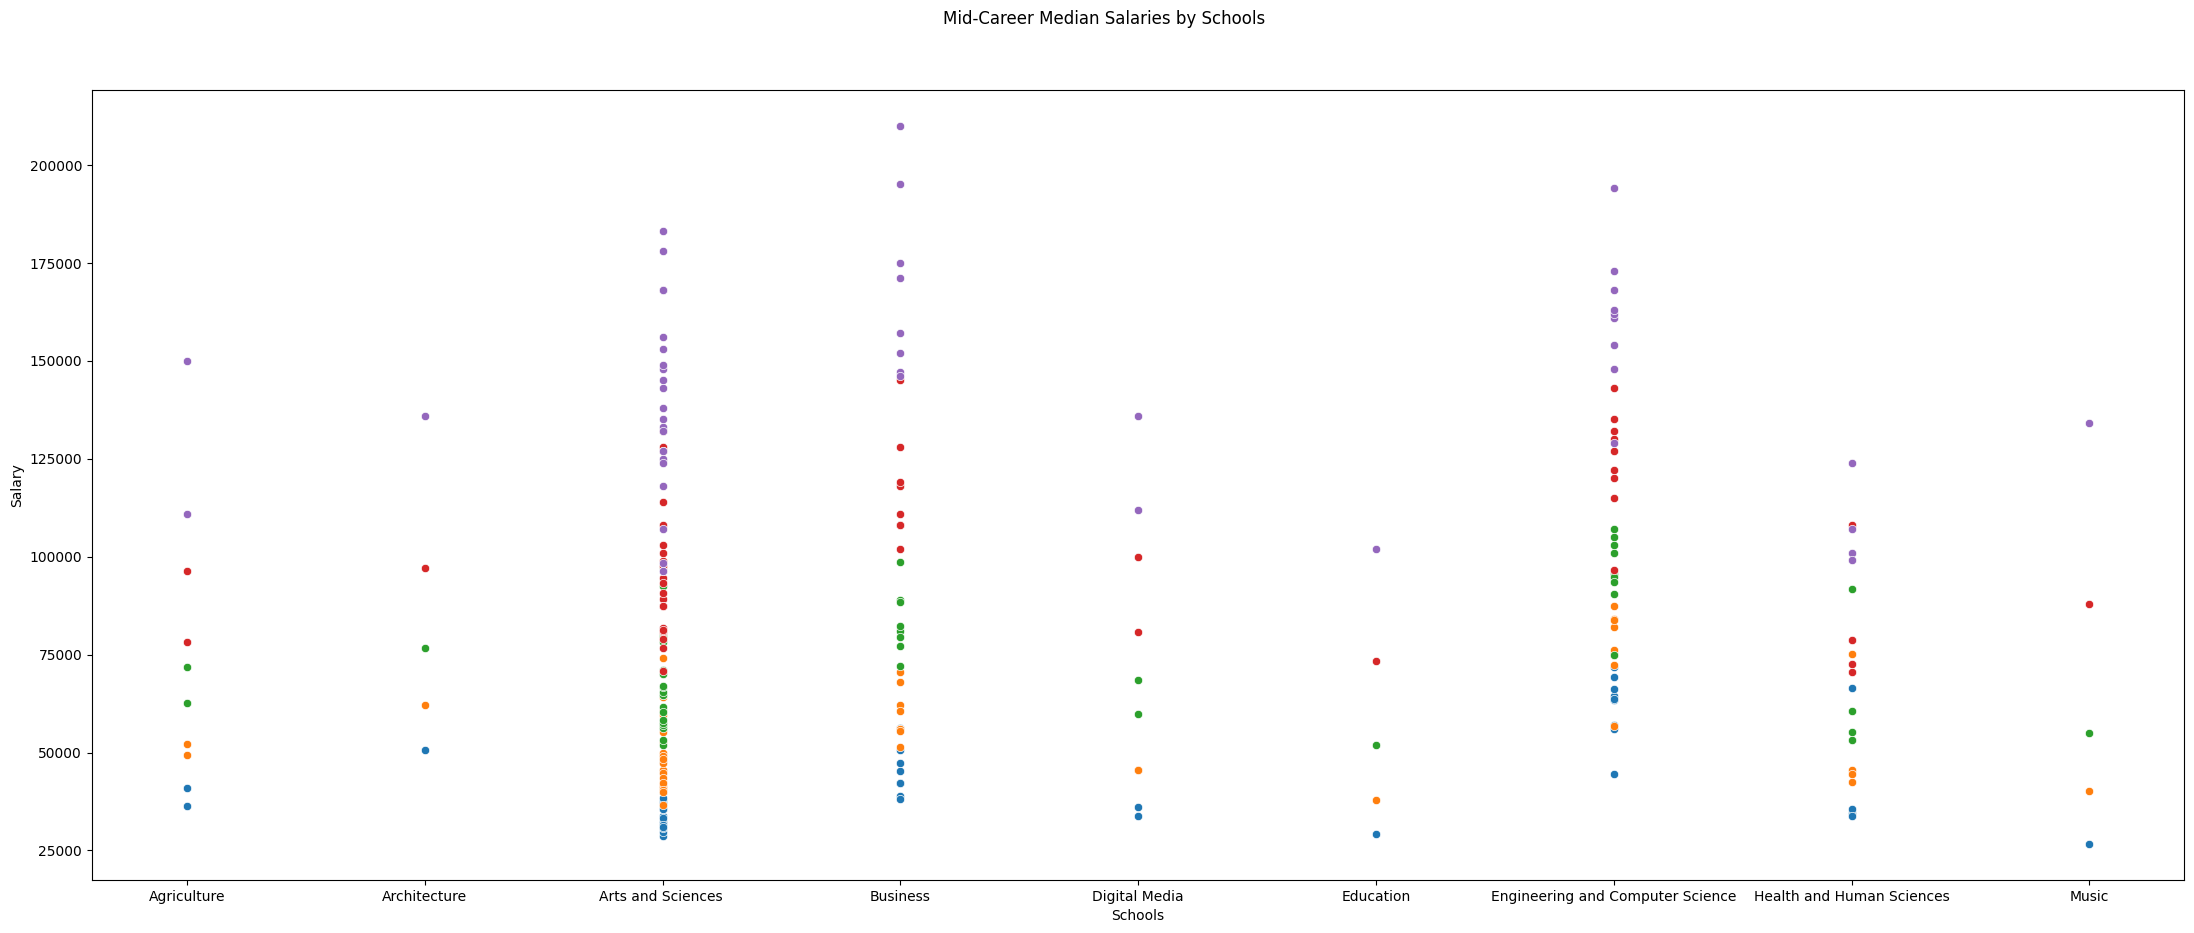

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a scatter plot using seaborn
plt.figure(figsize=(27, 10))

sns.scatterplot(x='Schools', y='Mid-Career 10th Percentile Salary', data=df)
sns.scatterplot(x='Schools', y='Mid-Career 25th Percentile Salary', data=df)
sns.scatterplot(x='Schools', y='Mid-Career Median Salary', data=df)
sns.scatterplot(x='Schools', y='Mid-Career 75th Percentile Salary', data=df)
sns.scatterplot(x='Schools', y='Mid-Career 90th Percentile Salary', data=df)

# set the plot titles and legend
plt.subplots_adjust(top=0.9)
plt.xlabel('Schools')
plt.ylabel('Salary')
plt.suptitle('Mid-Career Median Salaries by Schools')
plt.savefig('salary_by_schools.png')

# show the plot
plt.show()

The scatter plot was used to visualize the relationship between salaries and schools. The median salaries were plotted at different percentiles for each school. It allows you to visualize how the salaries vary across different schools and percentiles, and it also enables you see any patterns or trends in the data.

The features used in the scatter plot are the different salary percentiles for each school's majors: "Mid-Career 10th Percentile Salary", "Mid-Career 25th Percentile Salary", "Mid-Career Median Salary", "Mid-Career 75th Percentile Salary", and "Mid-Career 90th Percentile Salary". These features were used to visualize the salary range and distribution for different majors at each school.

**Evaluation of Model Strength:**

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('degrees-that-pay-back-PZ.csv')

In [ ]:
# Clean data
columns_to_clean = data.columns[3:]
for col in columns_to_clean:
    data[col] = data[col].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
def plot_linear_regression_line(X, y, target_name):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=X[:, 1], y=y, scatter_kws={'alpha': 0.5})
    plt.xlabel('Undergraduate Major')
    plt.ylabel(target_name)
    plt.title(f'{target_name} vs. Undergraduate Major')
    plt.show()

Model for Mid-Career 10th Percentile Salary:


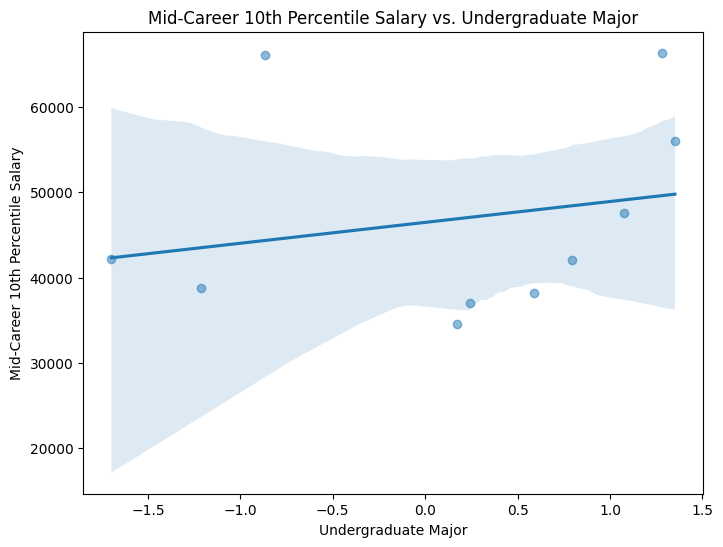

Mean Squared Error: 30072460.63356021
R2 Score: 0.762820519957409

Model for Mid-Career 25th Percentile Salary:


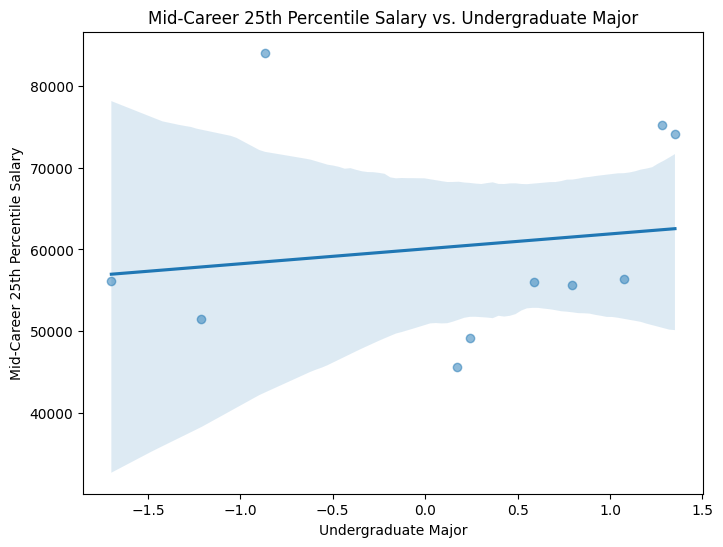

Mean Squared Error: 7540140.144748753
R2 Score: 0.9487674858637665

Model for Mid-Career 75th Percentile Salary:


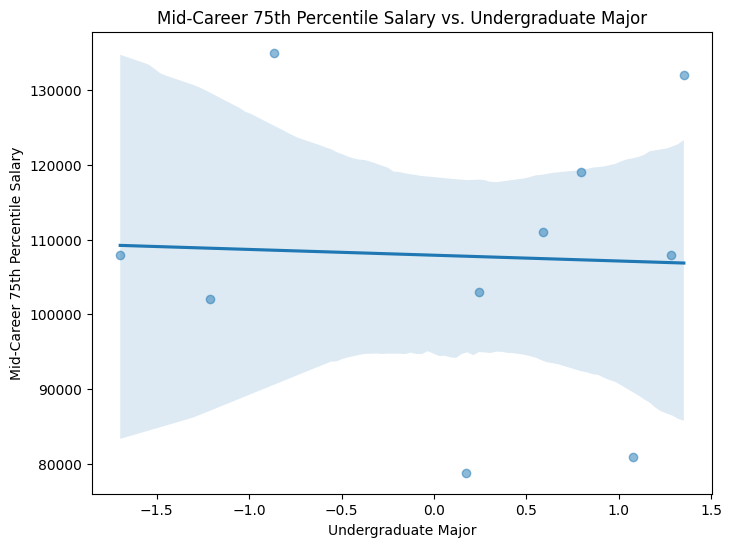

Mean Squared Error: 44212219.85409247
R2 Score: 0.8565712290229572

Model for Mid-Career 90th Percentile Salary:


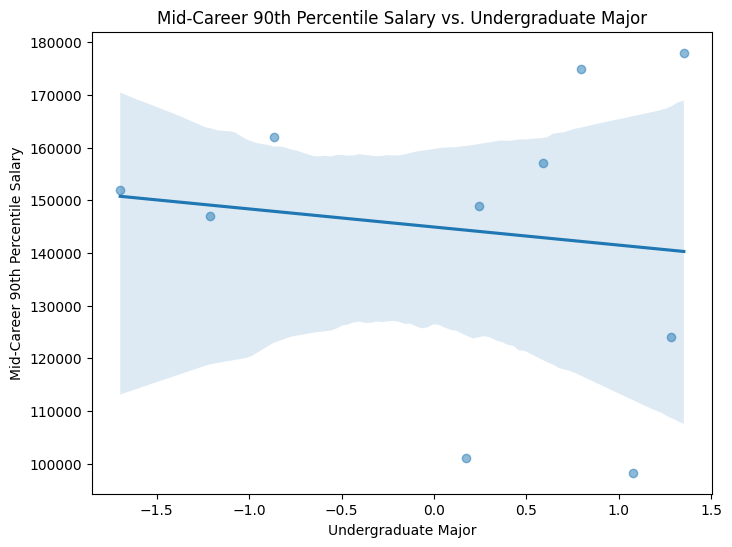

Mean Squared Error: 253861437.52984968
R2 Score: 0.6396266516771978



In [ ]:
# Convert categorical features into numerical values
le_schools = LabelEncoder()
data['Schools'] = le_schools.fit_transform(data['Schools'])
le_majors = LabelEncoder()
data['Undergraduate Major'] = le_majors.fit_transform(data['Undergraduate Major'])


# Split data into features (X) and targets (y)
X = data[['Schools', 'Undergraduate Major', 'Starting Median Salary', 'Mid-Career Median Salary', 'Percent change from Starting to Mid-Career Salary']]
y = data[['Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary', 'Mid-Career 90th Percentile Salary']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop through each target and train a separate model
for target in y.columns:
    print(f"Model for {target}:")
    
    y_single = y[target]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_single, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Predict and evaluate the model
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Plot the linear regression graph
    plot_linear_regression_line(X_test, y_test, target)
    print("Mean Squared Error:", mse)
    print("R2 Score:", r2)
    print()
   
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_single, test_size=0.2, random_state=42)

    # Create and train the Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(lr_model, f"{target}_model.joblib")

The strength of the models are relatively accurate for the most part. The R2 Score for each model explains the accuracy as follows: 

76% accurate for Mid-Career 75th Percentile Salary, 95% accurate for Mid-Career 25th Percentile Salary, 86% accurate for Mid-Career 75th Percentile Salary, and 64% accurate for Mid-Career 90th Percentile Salary. 

The Mean Squared Error might be telling a different story. The lower the value the better and it is certainly not 0 (a perfect score). The values are not closely fitted to the regression line to make a great linear model. This means that the values weren't perfectly predicted but they are at least positive values, showing a positive linear relationship.

**Team Member Contribution:**

Jessica - Data Modeling, Modeling Assumptions Satisfied, Modeling Assumptions Satisfied, Visualization and Interpretation of the Model, Evaluation of Model Strength

Jonathon - Data Exploration and Visualization, Data Preparation, Modeling Assumptions Satisfied

Patrick - Executive Summary and Introduction
